# Data Cleaning and Manipulation with Python and Pandas

## Introduction
In this notebook, you will learn how to clean and manipulate data from an Excel file using Python and the Pandas library. 
Follow the instructions and complete the exercises as you go along.

### Exercise 1: Importing the Data
1. Import the necessary libraries: Pandas and NumPy.
2. Read the Excel file 'Sample_dataset.xlsx' into a DataFrame named 'df'.
3. Display the first few rows of 'df' to inspect the data.


In [1]:
# Exercise 1: Importing the Data

# Import Pandas and NumPy
import pandas as pd
import numpy as np

# Read the Excel file into a DataFrame
df = pd.read_excel('Sample_dataset.xlsx')

# Display the first few rows of the DataFrame
df.head()


,SalesOrderNumber,SalesOrderLineNumber,OrderDate,ProductSubcategoryName,ProductName,OrderQuantity,TotalProductCost,SalesAmount
0,SO43697,1,2010-12-29,Road Bikes,"Road-150 Red, 62",1.0,2171.2942,3578.2700
1,SO43698,1,2010-12-29,Mountain Bikes,"Mountain-100 Silver, 44",1.0,1912.1544,3399.9900
2,SO43699,1,2010-12-29,Mountain Bikes,"Mountain-100 Silver, 44",NaN,1912.1544,3399.9900
3,SO43700,1,2010-12-29,Road Bikes,"Road-650 Black, 62",1.0,413.1463,699.0982
4,SO43701,1,2010-12-29,Mountain Bikes,"Mountain-100 Silver, 44",1.0,1912.1544,3399.9900


### Exercise 2: Handling Missing Values
1. Check for missing values in the DataFrame df.
2. Replace missing values in the 'OrderQuantity' column with the string 'data missing'.
3. Drop rows with missing values in the 'SalesAmount' column.ise 2: Handling Missing Values

In [2]:
# Exercise 2: Handling Missing Values

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Replace missing values in 'OrderQuantity' with 'data missing'
df['OrderQuantity'].fillna(int(0), inplace=True)

# Drop rows with missing values in 'SalesAmount'
df.dropna(subset=['SalesAmount'], inplace=True)

# Check for missing values after
missing_values = df.isnull().sum()
print(missing_values)



SalesOrderNumber          0
SalesOrderLineNumber      0
OrderDate                 0
ProductSubcategoryName    0
ProductName               0
OrderQuantity             3
TotalProductCost          0
SalesAmount               4
dtype: int64
SalesOrderNumber          0
SalesOrderLineNumber      0
OrderDate                 0
ProductSubcategoryName    0
ProductName               0
OrderQuantity             0
TotalProductCost          0
SalesAmount               0
dtype: int64


### Exercise 3: Data Manipulation
1. Add a new column 'Profit' calculated as the difference between 'SalesAmount' and 'TotalProductCost'.
2. Sort the DataFrame by 'OrderDate' in ascending order.
3. Filter the DataFrame to keep only rows where 'ProductSubcategoryName' is 'Mountain Bikes'.
4. Calculate the total sales amount for the filtered data.

In [5]:
# Exercise 3: Data Manipulation

# Add a new column 'Profit'
df['Profit'] = df['SalesAmount'] - df['TotalProductCost']

# Sort the DataFrame by 'OrderDate' in ascending order
df.sort_values(by='OrderDate', ascending=True, inplace=True)

# Filter the DataFrame for 'Mountain Bikes' ProductSubcategoryName
mbikes_data = df[df['ProductSubcategoryName'] == 'Mountain Bikes']

# Calculate the total sales amount for 'Mountain Bikes' ProductSubcategoryName
total_sales_mbikes = mbikes_data['SalesAmount'].sum()
total_sales_mbikes


9952759.564399999

### Exercise 4: Data Visualization
1. Plot a bar chart showing the count of products in each ProductSubcategoryName.
2. Create a histogram to visualize the distribution of 'OrderQuantity'.
3. Plot a line chart to show the trend of 'SalesAmount' over time.

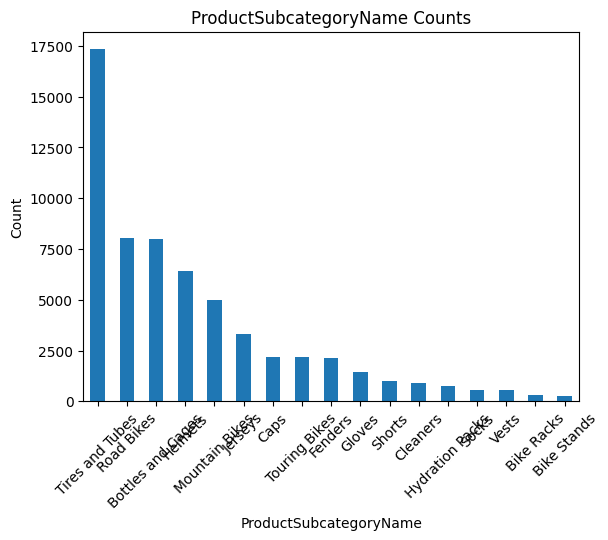

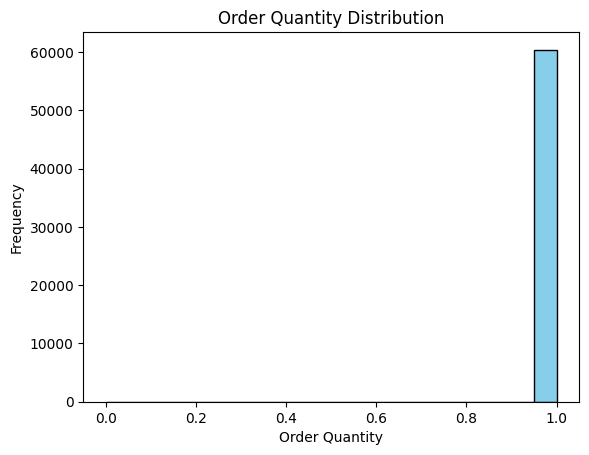

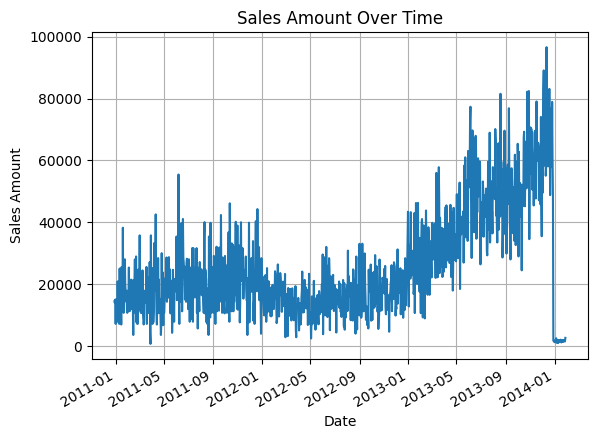

In [6]:
# Exercise 4: Data Visualization
import matplotlib.pyplot as plt

# Plot a bar chart for ProductSubcategoryName counts
product_subcategory_counts = df['ProductSubcategoryName'].value_counts()
product_subcategory_counts.plot(kind='bar')
plt.title("ProductSubcategoryName Counts")
plt.xlabel("ProductSubcategoryName")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a histogram for 'OrderQuantity' distribution
plt.hist(df['OrderQuantity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Order Quantity Distribution")
plt.xlabel("Order Quantity")
plt.ylabel("Frequency")
plt.show()

# Plot a line chart for 'SalesAmount' over time
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%Y')
sales_over_time = df.groupby('OrderDate')['SalesAmount'].sum()
sales_over_time.plot(kind='line')
plt.title("Sales Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid()
plt.show()